# **Introduction**

**Bayes' Theorem**

Probabilty of an event, based on prior knowledge of conditions.

`P(A|B) = P(B|A)*P(A)/P(B) `


---



---


This is what a machine learning algorithm is expected to do i.e predict something from prior knowledge. Hence, naive bayes is a machine learning algorithm. 

**We assume that the features are independent of each other but it is not always the case. But this algorithm performs well on dependent data too.**


**Example-**

Let's say


```

A: I will buy a car

B: I have money

P(A): 0.01(1%) i.e prob. of buying a car


P(B|A): 0.99 (99%) i.e probabilty of having money if I buy a car 

```
We can say P(A|B), prob. of A given B has happened should be 99% because if we have money then we can surely buy a car but its wrong.

```
Applying bayes theorem

P(A|B) = P(B|A) * P(A)/P(B) 

       = (0.99 * 0.01)/ (0.99*0.01) + (0.01*0.99)

       = 1/2

       = 0.5

```
It is clear from above that if we have money then 50% will be the probabilty that I will buy a car.

**Why?**
It's because of P(A) is too less that it's not contributing much in numerator but P(B) is contributing a lot in denominator.



**Maximum A Postreri (using best probabilty)**



```
MAP(h) = max(P(h|d))

        = max(P(d|h)*P(h)/P(d))

        = max(P(d|h))

```
since P(d) i.e prob. of data will be same for every class so it is just a constant hence we removed it.

P(h) is prob. of a particular class h, which if we have even classes, can be removed.

h: any hypothesis or label or class that we are trying to predict

d: data, which we are using to predict h

**We can use the above formula for data having fixed values or less diversity in training data. for ex- weather='sunny/rainy', car='moving/stop'.**

**We cant use this in real world data which has a lot of unique values in training data.**

# Gaussian Naive Bayes


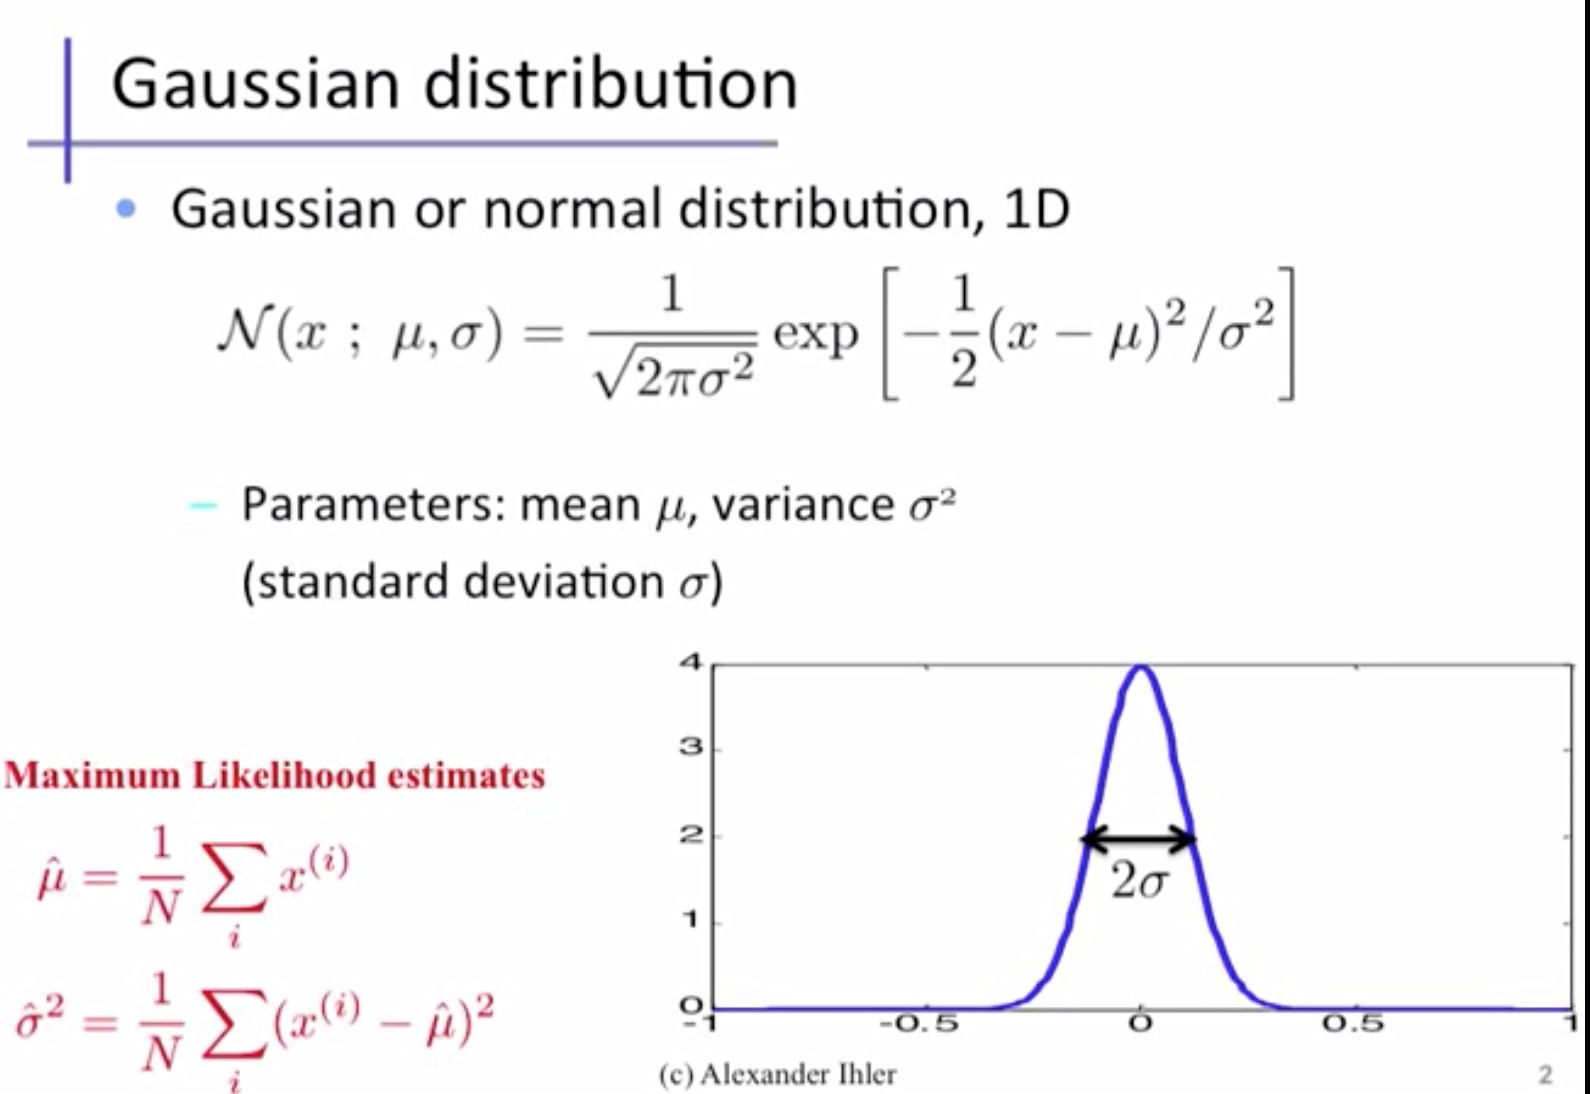


NB can be extended to real valued attributes by assuming a gaussian distribution. It is again easy as we just need standard deviation and mean only to perform prediction on any random data.

> numerator = **exp((-1\*(x-mean)^2)/ (2*(s.d)^2))**

> denominator = (s.d)\*root(2\*pi)

> p(x) = numerator/denominator

where x is input features

mean is mean of data

s.d is standard deviation

# Implementation

**STEP1. Prepare the data**

In [0]:
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]

**STEP2. Separate by Classes**

In [3]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]  # vector (i=0)  = [[3.393533211,2.331273381,0]]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

separated = separate_by_class(dataset)
for label in separated:
	print(label)
	for row in separated[label]:
		print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


**STEP3. Calculate mean and standard deviation (later, we will use it for particular class features' mean and sd)**

In [0]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))

In [0]:
from math import sqrt
 
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [0]:
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

In [12]:
summary = summarize_dataset(dataset)
print("For mean and S.D of feature X1", summary[0])
print("For mean and S.D of feature X2", summary[1])

For mean and S.D of feature X1 (5.178333386499999, 2.7665845055177263, 10)
For mean and S.D of feature X2 (2.9984683241, 1.218556343617447, 10)


**STEP4. Summarize by classes**


In [0]:
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [17]:
summary = summarize_by_class(dataset)
for label in summary:
	print("\n for class %s we caluclated mean and s.d of feature X1 and X2 \n" % label)
	for row in summary[label]:
		print(row)


 for class 0 we caluclated mean and s.d of feature X1 and X2 

(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)

 for class 1 we caluclated mean and s.d of feature X1 and X2 

(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)


**STEP5. Gaussian Probabilty**

In [0]:
from math import sqrt
from math import pi
from math import exp

def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [19]:
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


**STEP6. Class Probabilty**

In [0]:
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities
 

**STEP7. Test the algorithm**

In [26]:
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, [3.393533211,2.331273381])
print("when used a row from class 0", probabilities)
print(" class 0 > class 1 \n")
probabilities = calculate_class_probabilities(summaries, [9.172168622,2.511101045])
print("when used a row from class 1", probabilities)
print("class 1 > class 0")

when used a row from class 0 {0: 0.05032427673372076, 1: 0.00011557718379945765}
 class 0 > class 1 

when used a row from class 1 {0: 2.44629984336952e-12, 1: 0.018937264964228803}
class 1 > class 0
